# Project: Investigate a Dataset - [No - Show Appiontments](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
The dataset contains of 10,866 rows and 21 columns. The columns include;


|**Column Name**||**Description**|
|-----------------||-----------------|
|**PatientId**||Identification of a patient|
|**Appointment_ID**||Identification of each appointment|
|**Gender**||Male or Female|
|**Scheduled_Day**||The day of the actuall appointment, when they have to visit the doctor|
|**Appointment_Day**||The day someone called or registered the appointment, this is before appointment of course|
|**Age**||How old is the patient|
|**Neighbourhood**||Where the appointment takes place|
|**Scholarship**||True of False if the person had NHI| 
|**Hypertension**||True or False whether the person has the medical condition or not|
|**Diabetes**||True or False whether the person has the medical condition or not|
|**Alcoholism**||True or False whether the person has the medical condition or not|
|**Handicap**||Where the person is handicap or not|
|**SMS_Received**||True or False whether the person received the sms or not|
|**No_Show**||Yes or No whether the person showed up for the appointment or not|


### Question(s) for Analysis

1) What medical condition on or not on scholarship mostly show up or does not show up for appointment?

> Examine the connection between the the medical condition of various patients, whether or not they are on scholarship , and whether or not they are showing up for appointments.

2) What rate does those received sms show up for appointment?

> Analyzing the difference in attendance between patients who receive a text message confirmation after scheduling an appointment and those who do not.

3) How many show up and does not show up for appointment on handicap?

> To examine patient attendance in order to understand the relationship between those who are handicaps and those who do not.

4) Which gender has the highest appointment attendance?

> Develop understanding of gender (males and females) differences in appointment attendance.


- #### [Back to Table of Contents](#Table-of-Contents)

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load dataset

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check the shape of the dataset

df.shape

(110527, 14)

There are 110,527 rows and 14 columns in the dataset

In [4]:
# Check for duplicates

df.duplicated().sum()

0

There is no duplicate entry in the dataset

In [5]:
# Check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data set contains no missing values. Instead of datetime, the ScheduleDay and AppointmentDay columns use object datatype. In addition, speciﬁed column names that started with capital letters need to be modified, and others require renaming.



In [6]:
# Check the summary statistics of the dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The summary statistics show some irregularities in the Age column. A maximum of 155 years is being entered in the Age column, with a minimum age of -1.


## Data Cleaning

 

### Drop unwanted columns

In [7]:
# Drop "PatientId", "AppointmentId"

df.drop(["PatientId", "AppointmentID"], axis = 1, inplace = True)

In [8]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

### Column Renaming

In [9]:
# Rename columns

df.rename(columns={"ScheduledDay" : "Scheduled_Day", 
                   "AppointmentDay" : "Appointment_Day",
                   "No-show" : "No_show",
                   "Hipertension" : "Hypertension",
                   "Handcap": "Handicap"},
         inplace = True)

In [10]:
# Convert intial upper case into lower case

df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

### Change the scheduled_day and appointment_day datatype from object to datetime

In [11]:
# Change the "scheduled_day" and "appointment_day" datatype to datetime

df[["scheduled_day", "appointment_day"]] = df[["scheduled_day", "appointment_day"]].apply(pd.to_datetime)

In [12]:
# Check the datypes of "scheduled_day" and "appointment_day" columns

df[["scheduled_day", "appointment_day"]].dtypes

scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
dtype: object

### Visualise the distribution of the columns

In [13]:
# Extract categorical and numerical variables from the dataset

categorical_var = df.select_dtypes(include = "object")
numerical_var = df.select_dtypes(include = np.number)

#### Visualise the Categorical Variables 

In [14]:
# Iterate all Categorical Variables in the data

for col in categorical_var.columns:
    print(col)

gender
neighbourhood
no_show


In [15]:
# Create a function named "explore_categorical_var" to explore the categorical variables of the data

def explore_categorical_var(df, x):
    """ 
    To return the numerical and graphical summary of 
    categorical variables by taking df and x as argument. 
    
    df : dataframe of categorical variables.
    x : column of categorical variables dataframe.
    """
    
    nunique_categories = df[x].nunique()
    if nunique_categories <= 6 :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        sns.countplot(data = df, x = x)
        plt.title(x)
        plt.show()
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
        
    elif nunique_categories > 6 and nunique_categories <= 20 :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        sns.countplot(data = df, y = x)
        plt.title(x)
        plt.show()
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")
         
    else :
        print("Summary")
        print("===============================")
        print(df[x].describe(), "\n")
        print("===============================")
        print("Value count \n")
        print(df[x].value_counts(), "\n")

#### Gender Column

Summary
count     110527
unique         2
top            F
freq       71840
Name: gender, dtype: object 



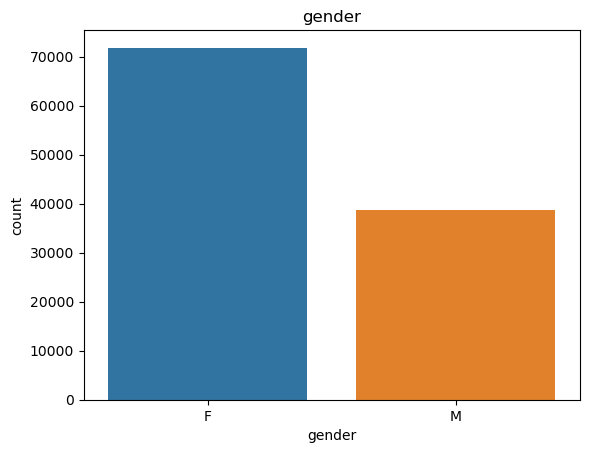

Value count 

F    71840
M    38687
Name: gender, dtype: int64 



In [16]:
# Explore "Gender" column

explore_categorical_var(df, "gender")

There are 71,840 females and 38,687 males out of the 110,527 entries in the dataset

#### Neighbourhood Column

In [17]:
# Explore the "Neighbourhood" Column

explore_categorical_var(df, "neighbourhood")

Summary
count             110527
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object 

Value count 

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64 



There are 81 unique neigbourhood with 7,717 booking from Jardim Camburi

#### N0_Show Column

Summary
count     110527
unique         2
top           No
freq       88208
Name: no_show, dtype: object 



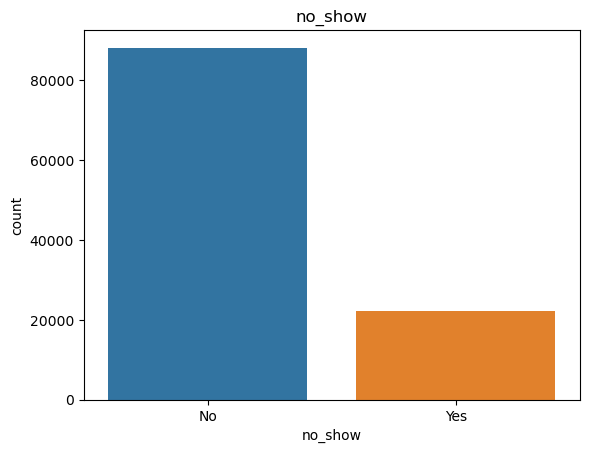

Value count 

No     88208
Yes    22319
Name: no_show, dtype: int64 



In [18]:
# Explore the "No_Show" column

explore_categorical_var(df, "no_show")

There are 88,208 patients who showed up for their appointment and 22,319 patient who didn't show up for their appointment

#### Visualise the Numerical Variables

In [19]:
# Iterate all Categorical Variables in the data

for col in numerical_var.columns:
    print(col)

age
scholarship
hypertension
diabetes
alcoholism
handicap
sms_received


In [20]:
def explor_numerical_var(df, x):
    """ 
    This function return the numerical and graphical summary of 
    numerical variables by taking df and x as argument.
    
    df : dataframe of numerical variables.
    x : column of numerical variables dataframe.
    """
        
    print("Summary Statistics \n")
    print(f"nunique       {df[x].nunique()}")    
    print(df[x].describe())
    print("==================================================")
    plt.figure(figsize = (8, 4))
    
    #Plot a box plot
    meanpointdrop = dict(marker = "D", markeredgecolor ="black", markerfacecolor ="firebrick")
    medianprops = dict(linestyle ="-.", linewidth = 3, color="gold")
    plt.subplot(1,2,1)
    plt.boxplot(df[x], vert = True, patch_artist = True, 
                notch = True, showmeans = True, medianprops = medianprops, 
                meanprops = meanpointdrop)
    plt.xlabel(df[x].name)
    plt.ylabel("Count")
    plt.title(x)

    # plotting a histogram
    plt.subplot(1,2,2)
    df[x].hist()
    plt.title(f"Distribution of {x}")
    plt.tight_layout()
    plt.xlabel(x)
    plt.ylabel("Count")
    
    plt.show()

####  Age Column

Summary Statistics 

nunique       104
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


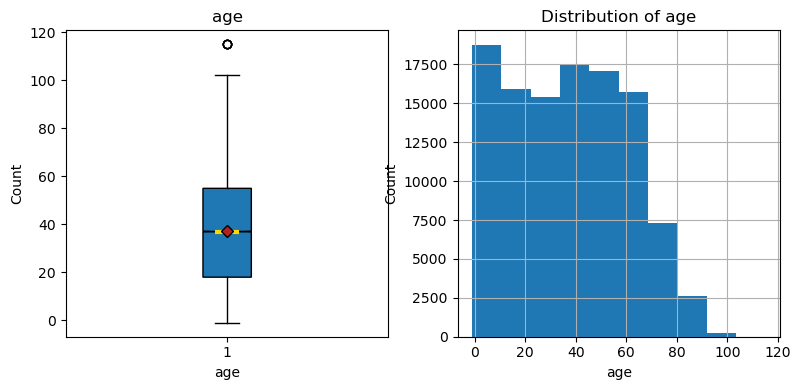

In [21]:
# Explore the "age" column

explor_numerical_var(df, "age")

It can be seen from the graphic above that there is an outlier and a minimum value of -1. The distribution also reveals that the majority of patients are between the ages of 0 and 65.

In [22]:
# Extract the minimum entry of age

df[df.age == df.age.min()]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


The entry above indicates that the age was entered incorrectly. This needs to be fixed, therefore the -1 will be change to a 1 since there is no year -1.

In [23]:
# Change the -1 to 1

df.age.replace(-1, 1, inplace = True) 

In [24]:
# Check the minimum value of "age" column

df.age.min()

0

In [25]:
# Extract the minimum entry of age

df[df.age == df.age.max()]

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


The maximum age is 115 according to the entry above, which also identifies the outlier from the boxplot from before. Since this input has no discernible impact on the dataset, it may be kept.

#### Scholarship Column 

Summary Statistics 

nunique       2
count    110527.000000
mean          0.098266
std           0.297675
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: scholarship, dtype: float64


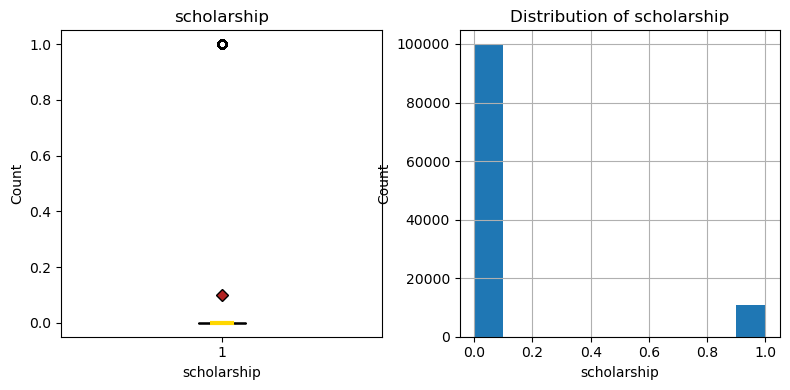

In [26]:
# Explore the "scholarship" column

explor_numerical_var(df, "scholarship")

According to the column's distribution, around 100,000 patients do not have access to scholarship, whereas 15,000 do. Additionally, the outlier that was visible on the boxplot also represented the number of patients enrolled on scholarship. Therefore, this cannot be regarded as an outlier.

#### Hypertension Column

Summary Statistics 

nunique       2
count    110527.000000
mean          0.197246
std           0.397921
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: hypertension, dtype: float64


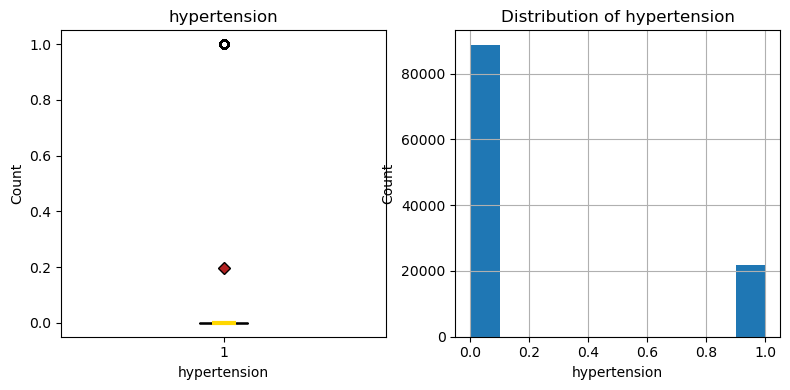

In [27]:
# Explore the "hypertension" column

explor_numerical_var(df, "hypertension")

According to the column's distribution, around 85,000 patients do not have hypertension, whereas 20,000 do. Additionally, the outlier that was visible on the boxplot also represented the number of patients suffering from hypertension. Therefore, this cannot be regarded as an outlier.

#### Diabetes Column

Summary Statistics 

nunique       2
count    110527.000000
mean          0.071865
std           0.258265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes, dtype: float64


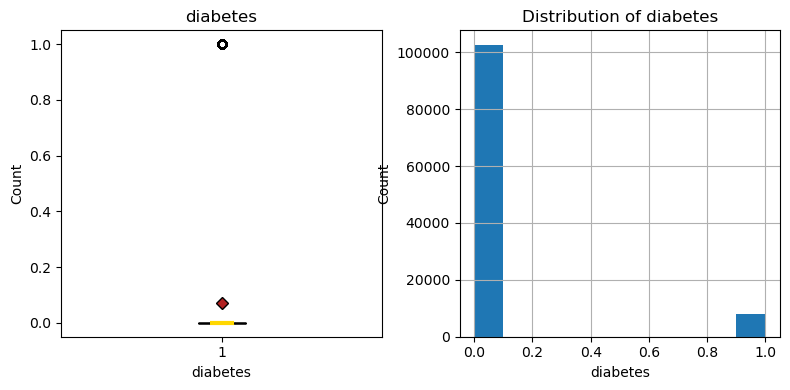

In [28]:
# Explore the "diabetes" column

explor_numerical_var(df, "diabetes")

According to the column's distribution, around 100,000 are not diabetic patients, whereas 5,000 do. Additionally, the outlier that was visible on the boxplot also represented the number of patients suffering from diabetes. Therefore, this cannot be regarded as an outlier.

#### Alcoholism Column

Summary Statistics 

nunique       2
count    110527.000000
mean          0.030400
std           0.171686
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: alcoholism, dtype: float64


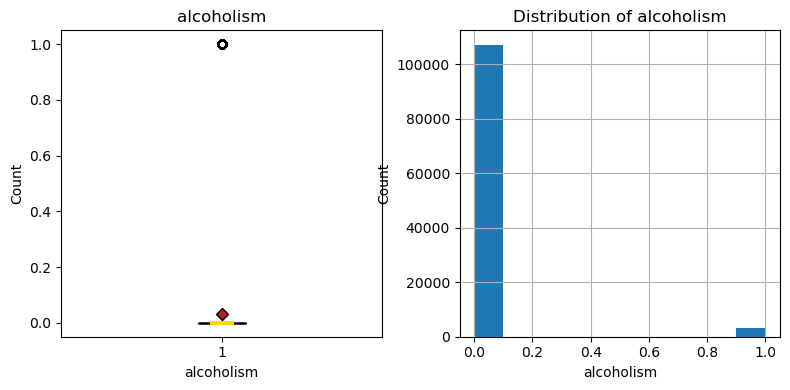

In [29]:
# Explore the "alcoholism" column

explor_numerical_var(df, "alcoholism")

Less than 10,000 patients are suffering from alcoholism, whereas about 150,000 do not. The outlier indicated in the boxplot represented the number of patients suffering from alcoholism. Therefore, this cannot be regarded as an outlier.

#### Handicap Column

Summary Statistics 

nunique       5
count    110527.000000
mean          0.022248
std           0.161543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: handicap, dtype: float64


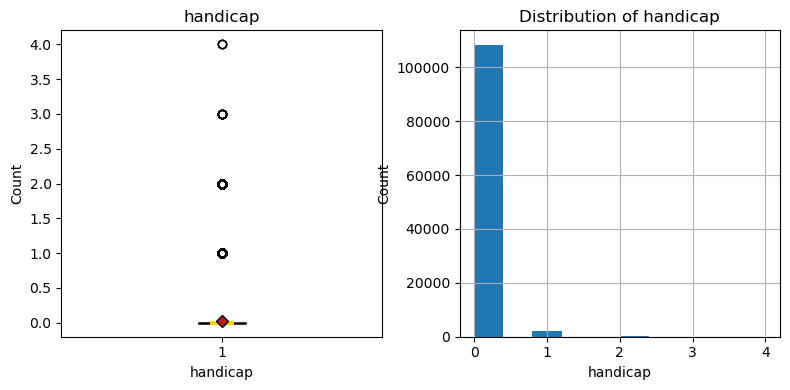

In [30]:
# Explore the "handicap" column

explor_numerical_var(df, "handicap")

There are 5 unique values in the column where most of the fall in 0 and the remaining falls between 1 and 4. There the markers in the boxplot cannot be treated as outliers

#### sms_received column

Summary Statistics 

nunique       2
count    110527.000000
mean          0.321026
std           0.466873
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: sms_received, dtype: float64


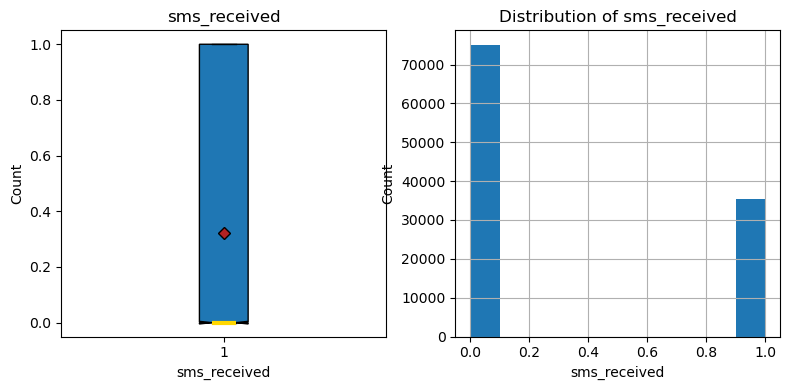

In [31]:
# Explore the "sms_received" column

explor_numerical_var(df, "sms_received")

The distribution shows about 75,000 of the patients didn't receive sms while about 35,000 did receive sms

### The correlation between various variables

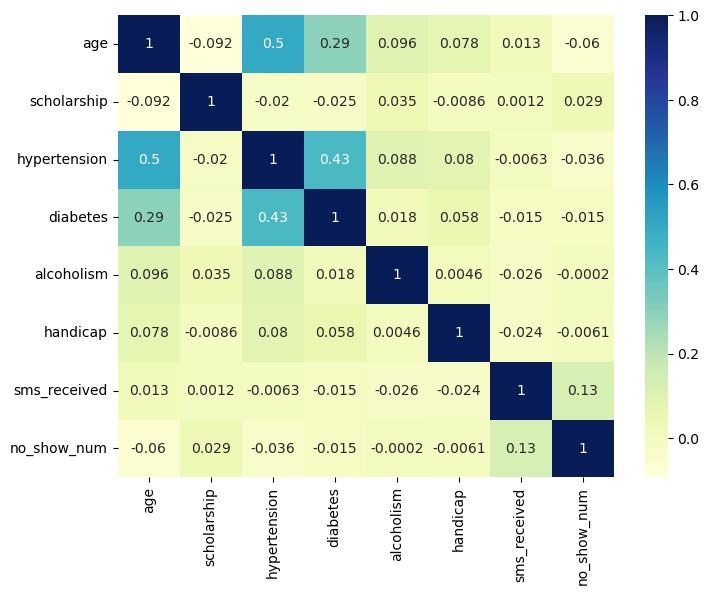

In [32]:
#Create s numerical version of on_show
df["no_show_num"] = (df["no_show"] == "Yes").astype(int)

# Calculate the correlation bwtween the numerical variables of the dataframe
corr = df.corr()

# Plot a heatmap for the correlation
plt.figure(figsize = (8, 6))
sns.heatmap(corr, 
            cmap="YlGnBu", 
            annot=True)
plt.show()

There is no strong correlation betweeen No Show and SMS Received and scholarship whereas there is a negative correlation between No Show and illness (Hypertension, diabetes, alcoholism and handicap).

- #### [Back to Table of Contents](#Table-of-Contents)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What medical condition on or not on scholarship mostly show up or does not show up for appointment?)

In [33]:
# Create a pivot table:percentage on show
condi = df.pivot_table(index = ["hypertension", "diabetes", "alcoholism"],
                       values = "no_show_num",
                       columns = "scholarship").mul(100)

In [34]:
condi.columns = ["Without", "With"]
condi

Without       With
hypertension diabetes alcoholism                      
0            0        0           20.549890  24.141568
                      1           18.704600  36.393443
             1        0           19.395866  26.016260
                      1           16.666667  18.750000
1            0        0           16.775834  20.205209
                      1           19.230769  14.973262
             1        0           17.422680  19.756098
                      1           16.525424  35.000000

In [35]:
# Melt data
condi = df[["no_show", 
            "hypertension", 
            "diabetes", 
            "alcoholism", 
            "scholarship"]].melt(id_vars = ["no_show", "scholarship"],
                                 var_name = "conditions",
                                 value_name = "value")
condi.head()

,no_show,scholarship,conditions,value
0,No,0,hypertension,1
1,No,0,hypertension,0
2,No,0,hypertension,0
3,No,0,hypertension,0
4,No,0,hypertension,1


In [36]:
# Get percentage show/no show for the categories
condi.groupby(["conditions",
               "value", 
               "scholarship"])["no_show"].value_counts(normalize = True).mul(100).head()

conditions  value  scholarship  no_show
alcoholism  0      0            No         80.158829
                                Yes        19.841171
                   1            No         76.492790
                                Yes        23.507210
            1      0            No         81.355932
Name: no_show, dtype: float64

In [37]:
# Select only No Show, ("Yes"), move scholarship to columns
data = condi.groupby(["conditions", 
                      "value", 
                      "scholarship"])["no_show"].value_counts(normalize = True).mul(100).unstack()["Yes"].unstack("scholarship")
data

scholarship                 0          1
conditions   value                      
alcoholism   0      19.841171  23.507210
             1      18.644068  28.219697
diabetes     0      19.973562  23.853478
             1      17.724437  21.616872
hypertension 0      20.490539  24.573911
             1      17.070844  19.745223

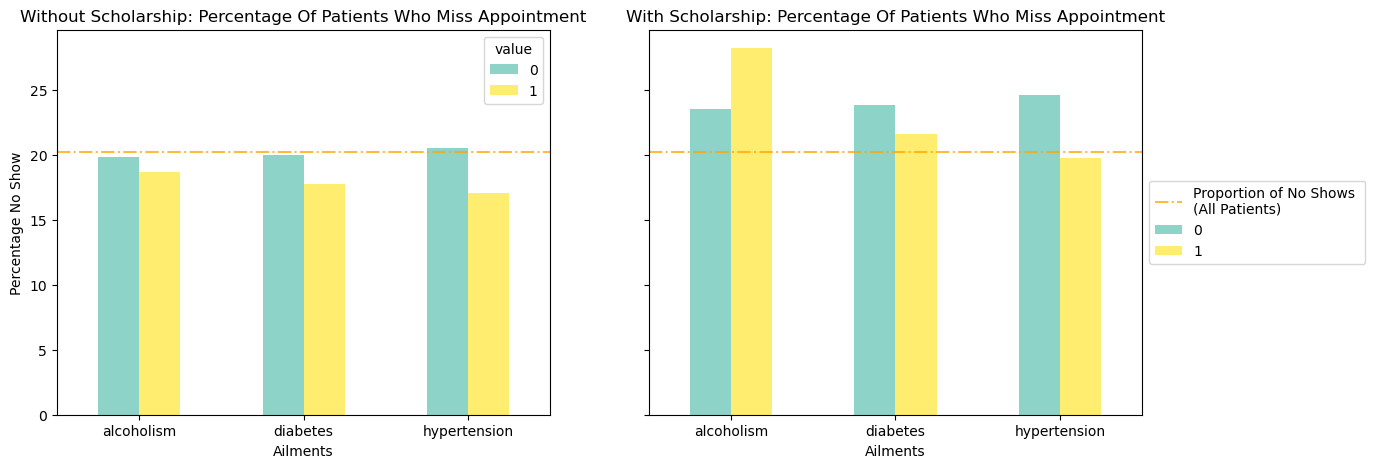

In [38]:
fig, ax = plt.subplots(1,2, figsize = [14, 5], sharey = True);

# Loop over columns, unstack values. plot
for ind, col in enumerate(data.columns):
    data[col].unstack("value").plot(kind = "bar",
            title = f"{'with' if col == 1 else 'without'} Scholarship: Percentage of Patients who miss Appointment".title(),
            xlabel = "Ailments",
            ylabel = "Percentage No Show",
            rot = 0,
            colormap = "Set3",
            ax = ax[ind])
    # Add line for proportions of all patients who do not show
    ax[ind].axhline(df["no_show"].value_counts(normalize = True)["Yes"]*100, 
            color = "orange",
            ls = "-.",
            alpha = 0.75,
            label = "Proportion of No Shows \n(All Patients)")
    if ind == 1:
        ax[ind].legend(loc = "center left", bbox_to_anchor = (1, 0.5)) 
           
plt.show()

This demonstrates that, patients with scholarships typically dose not show for appointments, in contrast to patients without scholarships. This generally means that the  proportion (20%) of no show of patients, whether on scholarship or not, tend to show up for appointments.

### Research Question 2  (What rate does those received sms show up for appointment?)

In [39]:
# Extract "no_show" and "sms_received" into a dataframe

sms_df = df[["no_show", "sms_received"]]

In [56]:
# Create a pivot table with the new dataframe

sms =  sms_df.pivot_table(index = "no_show",
                          values = "sms_received",
                          aggfunc = np.sum)

In [57]:
# Output the pivot table

sms

,sms_received
no_show,
No,25698.0
Yes,9784.0


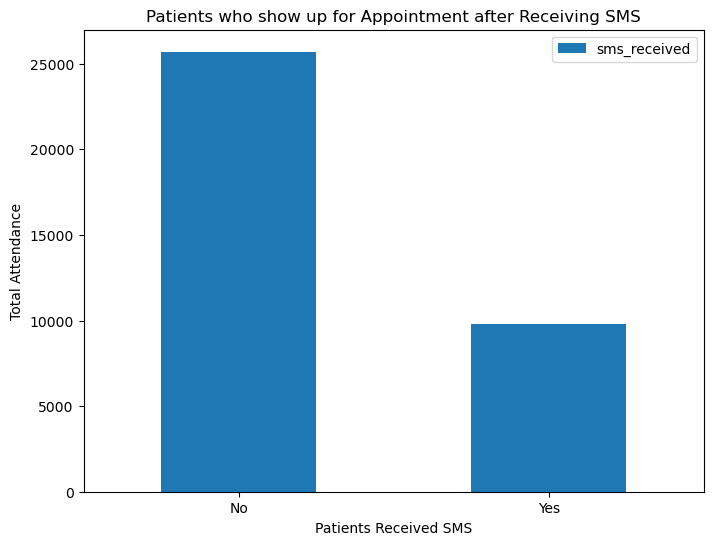

In [58]:
# Visualise the distribution

sms.plot(kind = "bar",
           title = "Patients who show up for Appointment after Receiving SMS",
           xlabel = "Patients Received SMS",
           ylabel = "Total Attendance",
           rot = 0,
           figsize = (8,6))
plt.show()

Most patients shows up for appointment after receiving sms. This indicate over 25,000 patients, while about 10,000 patients do not show up for appointment after receiving sms. 

### Research Question 3  (How many  show up and does not show up for appointment on handicap?)

In [43]:
# Extract the "no_show" and "handicap" into new dataframe

handi = df[["no_show", "handicap"]]

In [44]:
# Groupby handi in percentage

handi_df =  handi.groupby("handicap")["no_show"].value_counts(normalize = True).mul(100)

In [45]:
pd.DataFrame(handi_df)

no_show
handicap no_show           
0        No       79.764697
         Yes      20.235303
1        No       82.076396
         Yes      17.923604
2        No       79.781421
         Yes      20.218579
3        No       76.923077
         Yes      23.076923
4        No       66.666667
         Yes      33.333333

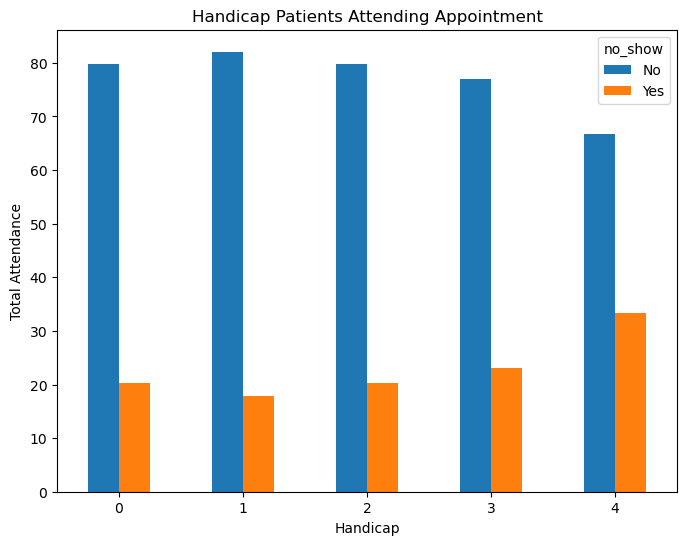

In [46]:
# Visualise the distribution

handi_df.unstack().plot(kind = "bar",
           title = "Handicap Patients Attending Appointment",
           xlabel = "Handicap",
           ylabel = "Total Attendance",
           rot = 0,
           figsize = (8,6))
plt.show()

This demonstrates that the majority of patients show for appointments not being handicap, whereas only a small number do not. In total, this represented about 80% and 20% patients, respectively.

### Research Question 4  (Which gender has the highest appointment attendance?)

In [47]:
# Groupby gender, get count for show/ no show

df.groupby("gender")["no_show"].value_counts()

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [48]:
# Groupby gender, get count for show/ no show, multiply by 100 for pecentage

gen_df = df.groupby("gender")["no_show"].value_counts(normalize = True).mul(100).unstack("gender")
gen_df

gender,F,M
no_show,,
No,79.685412,80.032052
Yes,20.314588,19.967948


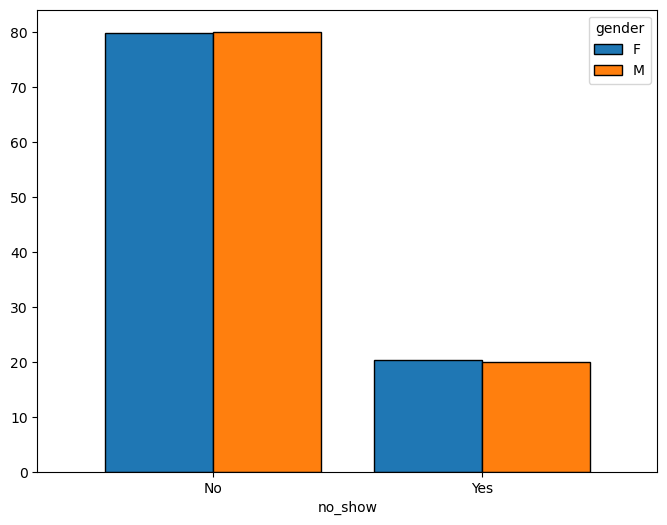

In [49]:
# Visualise the distribution

gen_df.plot.bar(edgecolor = "black",
                width = 0.8,
                rot = 0,
                figsize = [8,6])
plt.show()

According to the graph above, about 80% males show up for their appointments compared to 79% females.

- #### [Back to Table of Contents](#Table-of-Contents)

<a id='conclusions'></a>
## Conclusions

### What medical condition on or not on scholarship mostly show up or does not show up for appointment?
**Obeservation** This demonstrates that averagelly, patients with scholarships typically do not show for appointments, in contrast to patients without scholarships. This generally means that the majority of patients, whether on scholarship or not, tend to show up for appointments.

### What rate does those received sms show up for appointment?
**Observation** Most patients shows up for appointment after receiving sms. This indicate over 25,000 patients, while about 10,000 patients do not show up for appointment after receiving sms.

### How many show up and does not show up for appointment on handicap?
**Observation** Through the analysis, it was discovered that 80% shows up for appointment not handicap where the rest do. In total, this represented 80% not handicap and 20% people handicap.

### Which gender has the highest appointment attendance?
**Observation** Out of the total appointments scheduled, it was found that more than 79% Females and roughly 80% males actually showed up for their appointments. This demonstrates that, in contrast to Females, the majority of males prefer to make up for their appointment.

## Limitation of the dataset
> This finding cannot be generalized because this dataset was based on a particular geographic area.



- #### [Back to Table of Contents](#Table-of-Contents)